In [528]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
pd.options.display.float_format = '{:.5f}'.format

In [530]:
housing_data = pd.read_csv('housing.csv')
housing_data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23000,37.88000,41.00000,880.00000,129.00000,322.00000,126.00000,8.32520,452600.00000,NEAR BAY
1,-122.22000,37.86000,21.00000,7099.00000,1106.00000,2401.00000,1138.00000,8.30140,358500.00000,NEAR BAY
2,-122.24000,37.85000,52.00000,1467.00000,190.00000,496.00000,177.00000,7.25740,352100.00000,NEAR BAY
3,-122.25000,37.85000,52.00000,1274.00000,235.00000,558.00000,219.00000,5.64310,341300.00000,NEAR BAY
4,-122.25000,37.85000,52.00000,1627.00000,280.00000,565.00000,259.00000,3.84620,342200.00000,NEAR BAY
5,-122.25000,37.85000,52.00000,919.00000,213.00000,413.00000,193.00000,4.03680,269700.00000,NEAR BAY
6,-122.25000,37.84000,52.00000,2535.00000,489.00000,1094.00000,514.00000,3.65910,299200.00000,NEAR BAY
7,-122.25000,37.84000,52.00000,3104.00000,687.00000,1157.00000,647.00000,3.12000,241400.00000,NEAR BAY
8,-122.26000,37.84000,42.00000,2555.00000,665.00000,1206.00000,595.00000,2.08040,226700.00000,NEAR BAY
9,-122.25000,37.84000,52.00000,3549.00000,707.00000,1551.00000,714.00000,3.69120,261100.00000,NEAR BAY


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

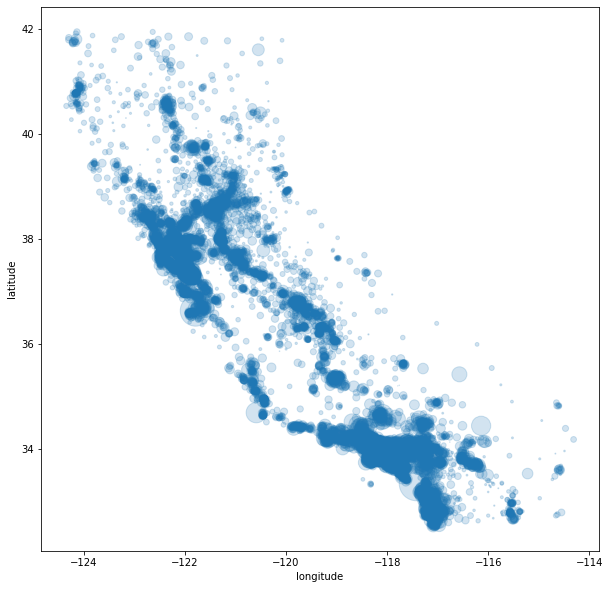

In [532]:
housing_data.plot(kind='scatter', x='longitude', y = 'latitude', alpha=0.2, s=housing_data['population']/30, figsize=(10,10))

# Podemos graficar la longitus

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

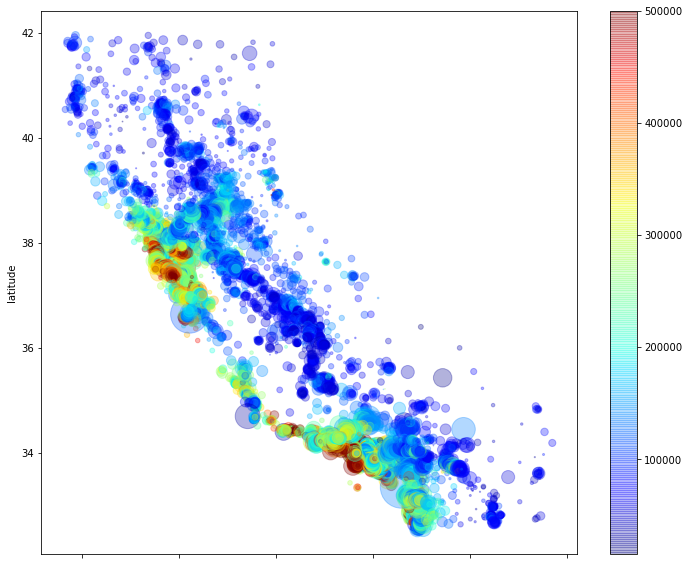

In [534]:
housing_data.plot(kind='scatter', x='longitude', y = 'latitude', alpha=0.3,
                  s=housing_data['population']/20, figsize=(12,10),
                  c=housing_data['median_house_value'], cmap=plt.get_cmap('jet'), colorbar=True)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

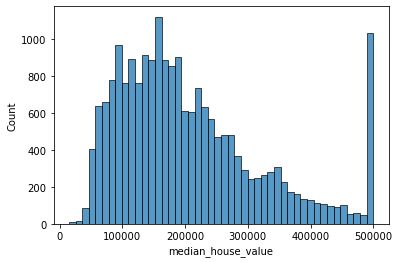

In [535]:
sns.histplot(housing_data['median_house_value'])

In [536]:
housing_data['ocean_proximity'].value_counts(ascending=True)

ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
INLAND        6551
<1H OCEAN     9136
Name: ocean_proximity, dtype: int64

In [541]:
housing_corr = housing_data.drop(['latitude', 'longitude', 'housing_median_age'], axis=1)
housing_corr.head()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,880.00000,129.00000,322.00000,126.00000,8.32520,452600.00000,NEAR BAY
1,7099.00000,1106.00000,2401.00000,1138.00000,8.30140,358500.00000,NEAR BAY
2,1467.00000,190.00000,496.00000,177.00000,7.25740,352100.00000,NEAR BAY
3,1274.00000,235.00000,558.00000,219.00000,5.64310,341300.00000,NEAR BAY
4,1627.00000,280.00000,565.00000,259.00000,3.84620,342200.00000,NEAR BAY


<AxesSubplot:>

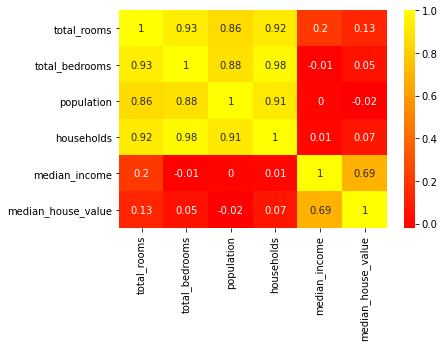

In [542]:
corr = housing_corr.corr().round(2)
sns.heatmap(corr, annot=True, cmap='autumn')

In [543]:
#housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
#housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
#housing_data["population_per_household"]=housing_data["population"]/housing_data["households"]

## Primero le damos un valor numérico a la cercanía de las casas al océano

In [544]:
from sklearn.preprocessing import OneHotEncoder

nominal_cod=OneHotEncoder(sparse=False)
nominal_cod.fit_transform(housing_data[['ocean_proximity']])

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [545]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [546]:
housing_data=housing_data.dropna()

### Creamos los dataframes que servirán como datos de entrenamiento y datos objetivo

In [547]:
data=housing_data.drop('median_house_value', axis=1)
target= housing_data['median_house_value']

# Ahora seleccionamos el ajuste, en este caso será una regresión lineal 

In [548]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [549]:
numerical_list=['median_income', 'total_rooms', 'housing_median_age', 'total_bedrooms']
categorical_list=['ocean_proximity']
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

In [550]:
transformer = ColumnTransformer([('num', num_transformer, numerical_list), ('cat', cat_transformer, categorical_list)])

In [551]:
train_data, test_data, target_train, target_test = train_test_split(data, target, test_size=0.7, random_state=1)
train_data.shape, test_data.shape, target_train.shape, target_test.shape

((6129, 9), (14304, 9), (6129,), (14304,))

In [1]:
model_linear_regression = Pipeline([('transformer', transformer),
                                   ('linear_regression', linear_regression)])

NameError: name 'Pipeline' is not defined

In [ ]:
model_linear_regression.fit(train_data, target_train)

In [2]:
prueba_data = test_data.iloc[:100]
m = model_linear_regression.predict(prueba_data)

NameError: name 'test_data' is not defined

In [3]:
lst = list(target_test.iloc[:100])

NameError: name 'target_test' is not defined

In [4]:
r = np.abs(m-lst)
r.mean()

NameError: name 'np' is not defined